In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df['RiskLevel'] = df['RiskLevel'].astype('category')

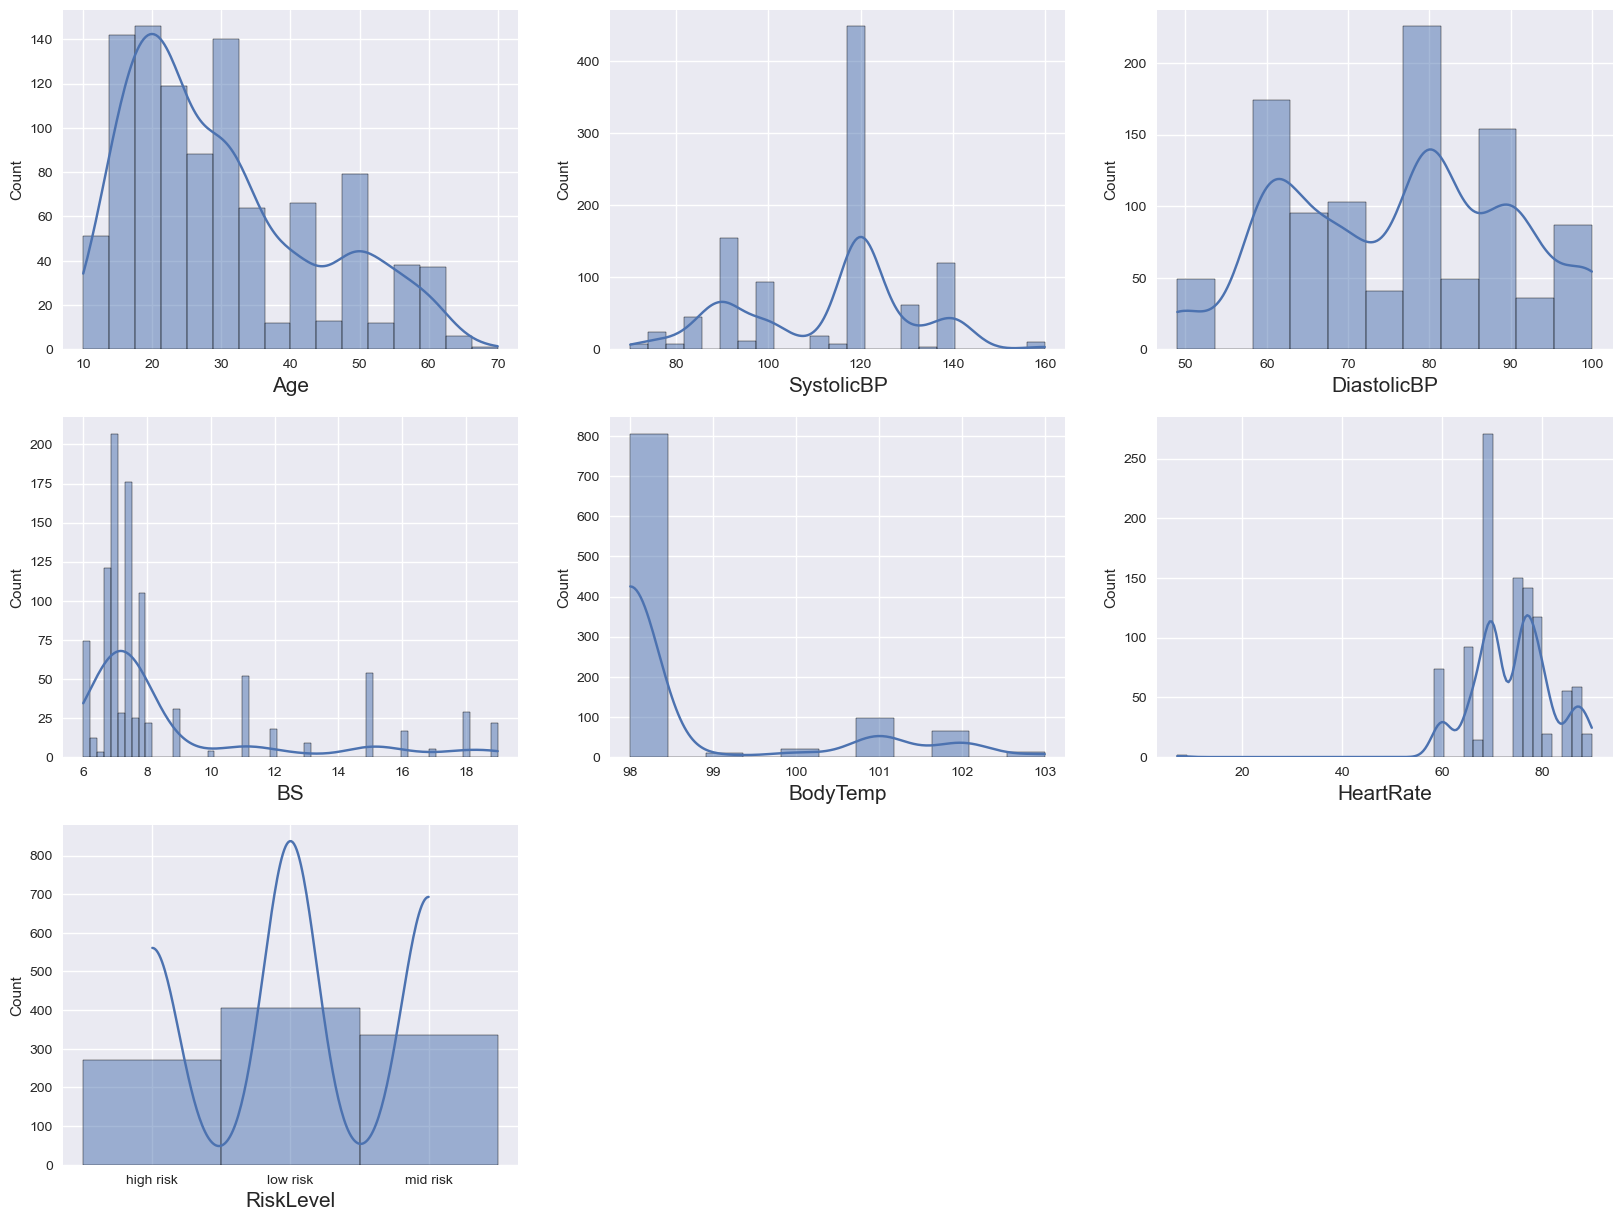

In [6]:
plt.figure(figsize = (20,15))
for i,col in enumerate(df):
    plt.subplot(3,3,i+1)
    sns.histplot(data = df, x=col, kde=True)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

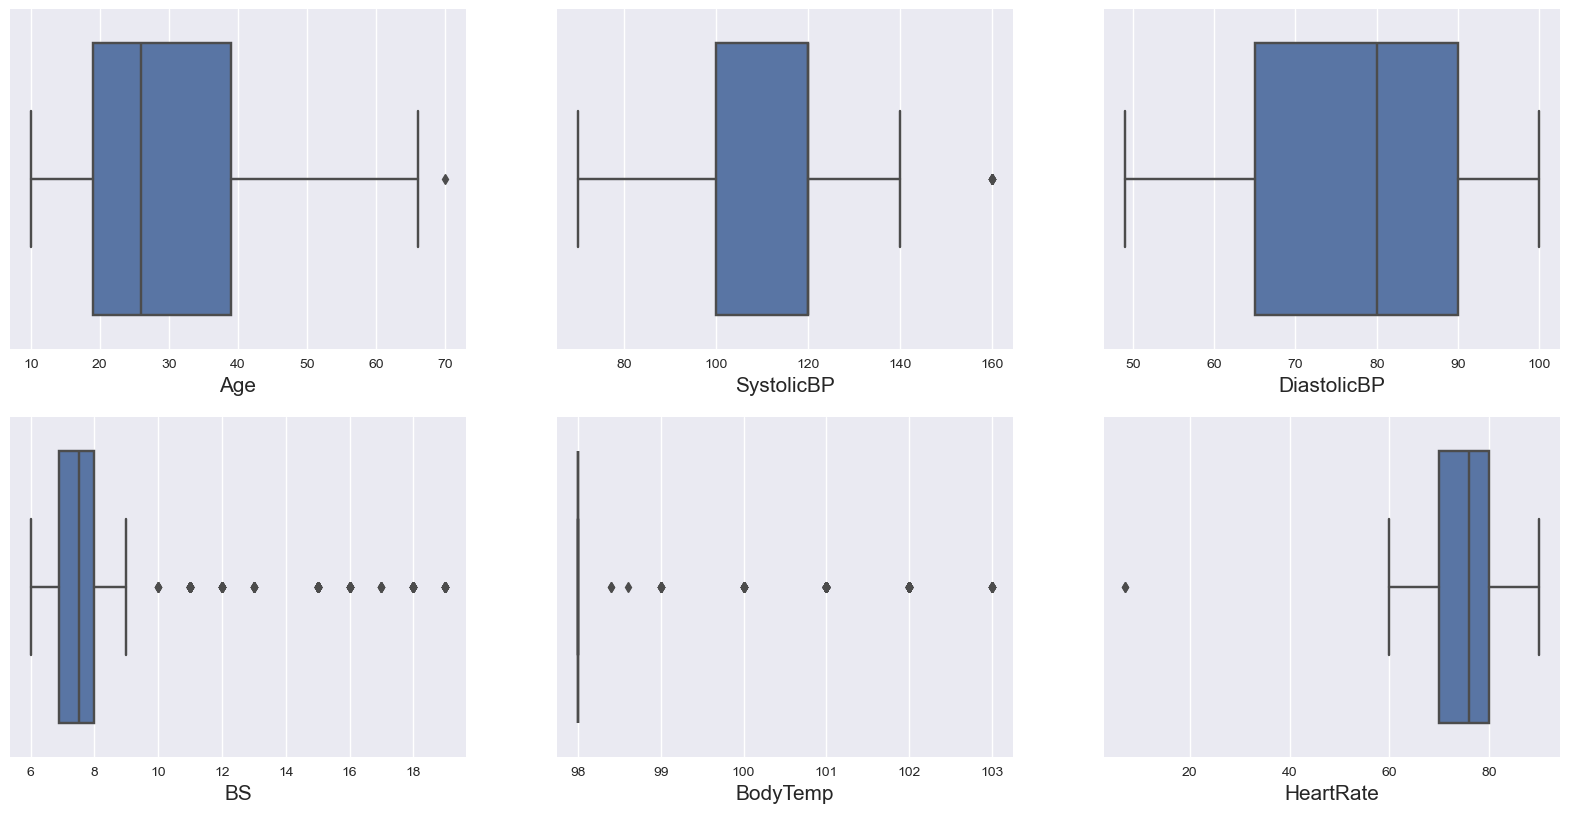

In [7]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.iloc[:,0:6]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df.iloc[:,0:6],x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

# Removing outliers

In [8]:
def detect_outliers(df):
    outliers = []
    
    for col in df.columns:
        # Calculate quartiles and IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # Define the fences
        fence_low = q1 - (1.5 * iqr)
        fence_high = q3 + (1.5 * iqr)
        
        # Identify outliers
        outliers_mask_low = df[col] < fence_low
        outliers_mask_high = df[col] > fence_high
        num_outliers = outliers_mask_low.sum() + outliers_mask_high.sum()
        
        # Replace outliers with fence values
        df.loc[outliers_mask_low, col] = fence_low
        df.loc[outliers_mask_high, col] = fence_high
        
        # Add information to the outliers list
        outliers.append({'Feature': col, "Num of Outliers": num_outliers, "Handled?": True})
    
    # Convert the list of dictionaries to a DataFrame
    outliers_df = pd.DataFrame(outliers, columns=["Feature", "Num of Outliers", "Handled?"])
    
    return outliers_df

In [9]:
detect_outliers(df.iloc[:,0:6])

,Feature,Num of Outliers,Handled?
0,Age,1,True
1,SystolicBP,10,True
2,DiastolicBP,0,True
3,BS,210,True
4,BodyTemp,210,True
5,HeartRate,2,True


# Encoding 'RiskLevel' column

In [10]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()
df['RiskLevel'] = lable_encoder.fit_transform(df['RiskLevel'])

In [11]:
df['RiskLevel'].unique()

array([0, 1, 2])

# Splitting the data

In [12]:
X = df.drop('RiskLevel', axis = 1)
Y = df['RiskLevel']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Fitting Logistic Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(x_train, y_train)
y_pred_l = log_reg.predict(x_test)

# Fitting Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(x_train,y_train)
y_pred_r = RFC.predict(x_test)

# Accuracy

In [15]:
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred_l)
random_acc = accuracy_score(y_test, y_pred_r)
print(f'Logistic regression accuracy = {logistic_acc}')
print(f'Random forests classifier accuracy = {random_acc}')

Logistic regression accuracy = 0.6600985221674877
Random forests classifier accuracy = 0.812807881773399
